In [1]:
pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 30.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
import os
import glob
from roboflow import Roboflow

rf = Roboflow(api_key="nDOcenhFAmFZN6k8gNiU")  # Replace with your API key

project_id = "blood-cell-cancer-classification-fzikr"

project = rf.workspace().project(project_id)

versions = project.versions()
for version in versions:
    print(f"Version {version.version}: {version.name}")

dataset = project.version(1).download("folder")  # Use "folder" format for classification

print(f"Dataset downloaded to: {dataset.location}")

# Show the directory structure
def show_directory(path, level=0):
    indent = "    " * level
    print(f"{indent}- {os.path.basename(path)}/")

    if os.path.isdir(path):
        for item in sorted(os.listdir(path)):
            item_path = os.path.join(path, item)
            if os.path.isdir(item_path):
                show_directory(item_path, level + 1)
            else:
                print(f"{indent}    - {item}")

# Display the downloaded dataset structure
print("\nDataset directory structure:")
show_directory(dataset.location)


loading Roboflow workspace...
loading Roboflow project...
Version 2: Blood Cell Cancer Classification
Version 1: Blood Cell Cancer Classification



Extracting Dataset Version Zip to Blood-Cell-Cancer-Classification-1 in folder:: 100%|██████████| 3228/3228 [00:01<00:00, 1912.70it/s]


Dataset downloaded to: /content/Blood-Cell-Cancer-Classification-1

Dataset directory structure:
- Blood-Cell-Cancer-Classification-1/
    - README.dataset.txt
    - README.roboflow.txt
    - test/
        - Benign/
            - Sap_013-29-_jpg.rf.8412853ab0e16abea4c8d9fc87637d67.jpg
            - Sap_013-34-_jpg.rf.0be3383415ab58b589f6ec31a48d0137.jpg
            - Sap_013-35-_jpg.rf.b2a9112756561bae39f239e8471721ad.jpg
            - Snap_004-4-_jpg.rf.742ebabe99e4ce82d400fd8f7e132844.jpg
            - Snap_006-3-_jpg.rf.ea5152bf38a1d7974a55f240bd0b258d.jpg
            - Snap_008-3-_jpg.rf.530c655d64bbb046cf380add8a30fbf1.jpg
            - Snap_010-3-_jpg.rf.61ed5370718f1a72b3af263fceabf433.jpg
            - Snap_011-4-_jpg.rf.e5bd62d030145acc1ee52923b7ff2ba8.jpg
            - Snap_012_jpg.rf.6c74ab859f89b7fd4877c00d0cec4cba.jpg
            - Snap_017-2-_jpg.rf.65b9daa6fce31bc26f9b7fe465a1b547.jpg
            - Snap_017-3-_jpg.rf.94b793e1631db37f431bb239e100b020.jpg
            - Sna

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from timm import create_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os

# Define dataset path
data_dir = "Blood-Cell-Cancer-Classification-1"
batch_size = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data Augmentation
transform = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Load datasets
datasets_dict = {x: datasets.ImageFolder(os.path.join(data_dir, x), transform[x]) for x in ['train', 'valid']}
dataloaders = {x: DataLoader(datasets_dict[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'valid']}
num_classes = len(datasets_dict['train'].classes)


This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


In [4]:
# Models to train
models = {
    'swin': create_model('swin_tiny_patch4_window7_224', pretrained=True, num_classes=num_classes),
    'convnext': create_model('convnext_tiny', pretrained=True, num_classes=num_classes),
    'efficientnet': create_model('tf_efficientnetv2_s', pretrained=True, num_classes=num_classes)
}


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/86.5M [00:00<?, ?B/s]

In [5]:
# Training function
def train_model(model, criterion, optimizer, num_epochs=10):
    model.to(device)
    best_acc = 0.0
    for epoch in range(num_epochs):
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            correct = 0
            total = 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                correct += torch.sum(preds == labels.data)
                total += labels.size(0)

            epoch_loss = running_loss / len(datasets_dict[phase])
            epoch_acc = correct.double() / len(datasets_dict[phase])

            print(f'Epoch {epoch+1}/{num_epochs} | {phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), f'{model_name}_best.pth')

    print(f'Best validation accuracy: {best_acc:.4f}')
    return model

In [6]:
# Train and evaluate models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=1e-4)
    trained_model = train_model(model, criterion, optimizer)

    # Load best model and evaluate on validation set
    model.load_state_dict(torch.load(f'{model_name}_best.pth'))
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for inputs, labels in dataloaders['valid']:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f'Performance for {model_name}: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}')



Training swin...
Epoch 1/10 | train Loss: 0.2321 Acc: 0.9167
Epoch 1/10 | valid Loss: 0.0484 Acc: 0.9922
Epoch 2/10 | train Loss: 0.0606 Acc: 0.9800
Epoch 2/10 | valid Loss: 0.0753 Acc: 0.9813
Epoch 3/10 | train Loss: 0.0273 Acc: 0.9907
Epoch 3/10 | valid Loss: 0.0360 Acc: 0.9938
Epoch 4/10 | train Loss: 0.0242 Acc: 0.9915
Epoch 4/10 | valid Loss: 0.0559 Acc: 0.9844
Epoch 5/10 | train Loss: 0.0173 Acc: 0.9960
Epoch 5/10 | valid Loss: 0.0475 Acc: 0.9922
Epoch 6/10 | train Loss: 0.0108 Acc: 0.9978
Epoch 6/10 | valid Loss: 0.0354 Acc: 0.9922
Epoch 7/10 | train Loss: 0.0183 Acc: 0.9942
Epoch 7/10 | valid Loss: 0.0386 Acc: 0.9938
Epoch 8/10 | train Loss: 0.0138 Acc: 0.9960
Epoch 8/10 | valid Loss: 0.0340 Acc: 0.9922
Epoch 9/10 | train Loss: 0.0159 Acc: 0.9942
Epoch 9/10 | valid Loss: 0.0218 Acc: 0.9969
Epoch 10/10 | train Loss: 0.0009 Acc: 1.0000
Epoch 10/10 | valid Loss: 0.0321 Acc: 0.9953
Best validation accuracy: 0.9969
Performance for swin: Acc=0.9969, Prec=0.9953, Rec=0.9969, F1=0.996

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Epoch 1/10 | train Loss: 0.4505 Acc: 0.8357
Epoch 1/10 | valid Loss: 0.0641 Acc: 0.9844
Epoch 2/10 | train Loss: 0.0526 Acc: 0.9835
Epoch 2/10 | valid Loss: 0.0863 Acc: 0.9766
Epoch 3/10 | train Loss: 0.0195 Acc: 0.9929
Epoch 3/10 | valid Loss: 0.0750 Acc: 0.9782
Epoch 4/10 | train Loss: 0.0276 Acc: 0.9924
Epoch 4/10 | valid Loss: 0.0309 Acc: 0.9953
Epoch 5/10 | train Loss: 0.0011 Acc: 1.0000
Epoch 5/10 | valid Loss: 0.0412 Acc: 0.9907
Epoch 6/10 | train Loss: 0.0007 Acc: 1.0000
Epoch 6/10 | valid Loss: 0.0506 Acc: 0.9907
Epoch 7/10 | train Loss: 0.0067 Acc: 0.9978
Epoch 7/10 | valid Loss: 0.0337 Acc: 0.9969
Epoch 8/10 | train Loss: 0.0528 Acc: 0.9831
Epoch 8/10 | valid Loss: 0.1392 Acc: 0.9673
Epoch 9/10 | train Loss: 0.0233 Acc: 0.9933
Epoch 9/10 | valid Loss: 0.0318 Acc: 0.9938
Epoch 10/10 | train Loss: 0.0015 Acc: 0.9996
Epoch 10/10 | valid Loss: 0.0250 Acc: 0.9984
Best validation accuracy: 0.9984
Performance for convnext: Acc=0.9984, Prec=0.9969, Rec=0.9984, F1=0.9977

Training ef

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


Epoch 1/10 | train Loss: 0.6019 Acc: 0.9078
Epoch 1/10 | valid Loss: 0.1719 Acc: 0.9626
Epoch 2/10 | train Loss: 0.1167 Acc: 0.9764
Epoch 2/10 | valid Loss: 0.0599 Acc: 0.9844
Epoch 3/10 | train Loss: 0.0474 Acc: 0.9898
Epoch 3/10 | valid Loss: 0.1478 Acc: 0.9829
Epoch 4/10 | train Loss: 0.0241 Acc: 0.9938
Epoch 4/10 | valid Loss: 0.0691 Acc: 0.9891
Epoch 5/10 | train Loss: 0.0197 Acc: 0.9933
Epoch 5/10 | valid Loss: 0.0848 Acc: 0.9891
Epoch 6/10 | train Loss: 0.0153 Acc: 0.9951
Epoch 6/10 | valid Loss: 0.0889 Acc: 0.9907
Epoch 7/10 | train Loss: 0.0233 Acc: 0.9942
Epoch 7/10 | valid Loss: 0.1149 Acc: 0.9922
Epoch 8/10 | train Loss: 0.0155 Acc: 0.9947
Epoch 8/10 | valid Loss: 0.1224 Acc: 0.9907
Epoch 9/10 | train Loss: 0.0149 Acc: 0.9951
Epoch 9/10 | valid Loss: 0.1266 Acc: 0.9938
Epoch 10/10 | train Loss: 0.0066 Acc: 0.9982
Epoch 10/10 | valid Loss: 0.1416 Acc: 0.9922
Best validation accuracy: 0.9938
Performance for efficientnet: Acc=0.9938, Prec=0.9923, Rec=0.9938, F1=0.9930


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


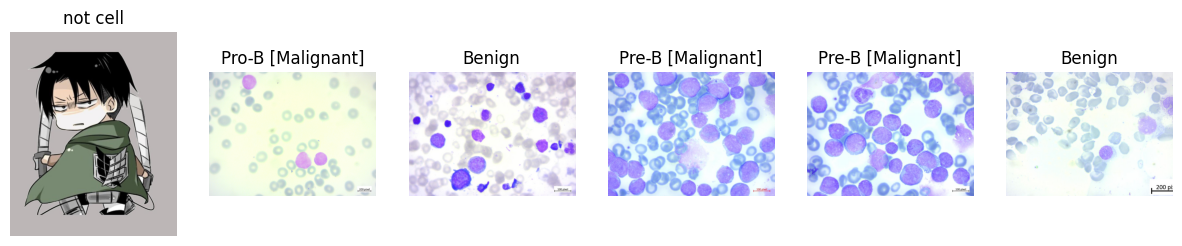

In [7]:
import os
import random
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# Function to visualize random images from the dataset
def visualize_random_images(data_dir, num_images=6):
    """
    This function randomly selects images from the dataset and visualizes them.

    Args:
        data_dir (str): Path to the dataset directory.
        num_images (int): Number of random images to display.
    """
    classes = os.listdir(data_dir)
    images = []

    for _ in range(num_images):
        random_class = random.choice(classes)
        class_path = os.path.join(data_dir, random_class)
        random_image = random.choice(os.listdir(class_path))
        images.append(os.path.join(class_path, random_image))

    # Display the images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_path in enumerate(images):
        img = plt.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(img_path.split(os.sep)[-2])  # Display class name
    plt.show()

# Path to dataset directory (Update this path if needed)
dataset_path = "Blood-Cell-Cancer-Classification-1/train"

# Visualize random images from the dataset
visualize_random_images(dataset_path, num_images=6)


In [8]:
pip install torch torchvision timm torchcam matplotlib numpy grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 19.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s 


Generating Grad-CAM for swin...


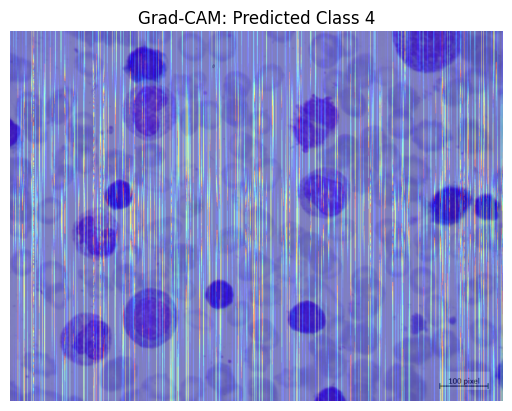


Generating Grad-CAM for convnext...


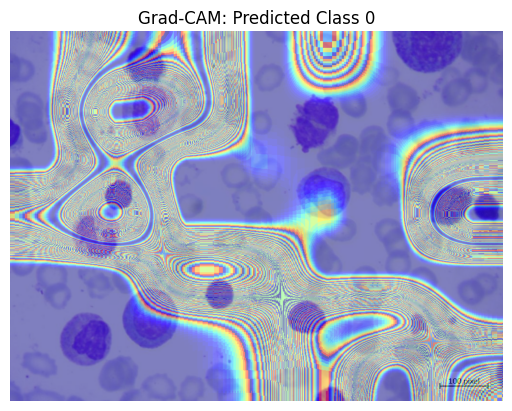


Generating Grad-CAM for efficientnet...


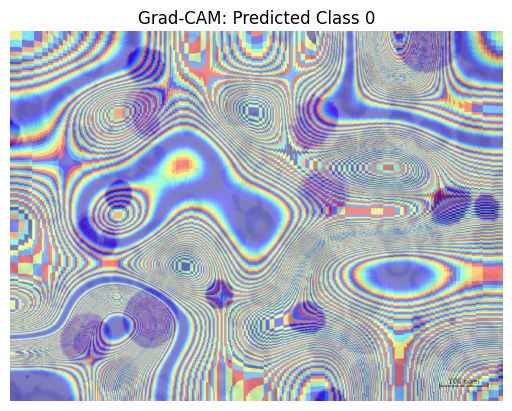

In [9]:
import torch
import timm
import torch.nn as nn
import torchvision.transforms as transforms
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the number of classes for your classification task
num_classes = 5  # Modify according to your dataset

# Initialize models
models = {
    'swin': timm.create_model('swin_tiny_patch4_window7_224', pretrained=False, num_classes=num_classes),
    'convnext': timm.create_model('convnext_tiny', pretrained=False, num_classes=num_classes),
    'efficientnet': timm.create_model('tf_efficientnetv2_s', pretrained=False, num_classes=num_classes)
}

# Load pre-trained weights for each model (assuming you have the weights saved in the same directory)
for model_name, model in models.items():
    try:
        state_dict = torch.load(f'{model_name}_best.pth', map_location=device)

        # Remove the final classification layer if there's a mismatch
        if model_name == "swin":
            del state_dict['head.fc.weight']
            del state_dict['head.fc.bias']

        model.load_state_dict(state_dict, strict=False)
    except Exception as e:
        print(f"Error loading weights for {model_name}: {e}")

    model.to(device)
    model.eval()

# Image Preprocessing
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0)
    return img, img_tensor

# Grad-CAM setup for each model
def get_gradcam(model, target_layer):
    gradcam = GradCAM(model, target_layer)
    return gradcam

# Generate Grad-CAM visualization
def generate_gradcam(model, image, target_layer, class_idx=None):
    gradcam = get_gradcam(model, target_layer)

    # Preprocess image and forward pass
    img, image_tensor = preprocess_image(image)
    image_tensor = image_tensor.to(device)
    image_tensor.requires_grad_()  # Ensure gradients are enabled for the input tensor

    model.eval()

    # Forward pass with gradient tracking
    outputs = model(image_tensor)
    if class_idx is None:
        class_idx = outputs.argmax(dim=1).item()  # Default to max class

    # Backward pass on the predicted class
    model.zero_grad()  # Zero gradients before backward pass
    outputs[:, class_idx].backward(retain_graph=True)  # Compute gradients for the class

    # Generate Grad-CAM heatmap
    activation_map = gradcam(class_idx, outputs)
    heatmap = activation_map[0].cpu().numpy()

    # Ensure heatmap is 2D (grayscale) for proper visualization
    if heatmap.ndim == 3:  # In case it's 3D (channels, height, width), reduce it
        heatmap = heatmap.mean(axis=0)  # Take the mean across channels for simplicity

    # Normalize heatmap for visualization (between 0 and 255)
    heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())
    heatmap = np.uint8(255 * heatmap)

    # Convert heatmap to PIL Image and overlay on original image
    heatmap_img = Image.fromarray(heatmap, mode='L')
    result = overlay_mask(img, heatmap_img, alpha=0.5)

    # Show Grad-CAM result
    plt.imshow(result)
    plt.axis('off')
    plt.title(f'Grad-CAM: Predicted Class {class_idx}')
    plt.show()

# Visualize Grad-CAM for a test image
def visualize_gradcam_for_model(model_name, model, target_layer, image_path):
    print(f"\nGenerating Grad-CAM for {model_name}...")
    generate_gradcam(model, image_path, target_layer)

# Main loop to generate Grad-CAMs
image_path = 'Blood-Cell-Cancer-Classification-1/test/Benign/Sap_013-29-_jpg.rf.8412853ab0e16abea4c8d9fc87637d67.jpg'  # Replace with your test image path
for model_name, model in models.items():
    # Select target layer based on model
     if model_name == 'swin':
        target_layer = model.layers[-1]  # Last layer for Swin
     elif model_name == 'convnext':
        target_layer = model.stages[-1]  # Last stage for ConvNeXt
     elif model_name == 'efficientnet':
        target_layer = model.conv_head  # Final convolutional layer for EfficientNetV2
     # Generate and visualize Grad-CAM for the selected model
     visualize_gradcam_for_model(model_name, model, target_layer, image_path)

In [10]:
# Step 1: Clean up all OpenCV versions
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

# Step 2: Install clean headless version
!pip install opencv-python-headless==4.10.0.84 --force-reinstall


import cv2
print("OpenCV version:", cv2.__version__)


Found existing installation: opencv-python 4.11.0.86
Uninstalling opencv-python-4.11.0.86:
  Successfully uninstalled opencv-python-4.11.0.86
Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84
Found existing installation: opencv-contrib-python 4.11.0.86
Uninstalling opencv-contrib-python-4.11.0.86:
  Successfully uninstalled opencv-contrib-python-4.11.0.86
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 27.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uni


Generating EigenCAM for swin...


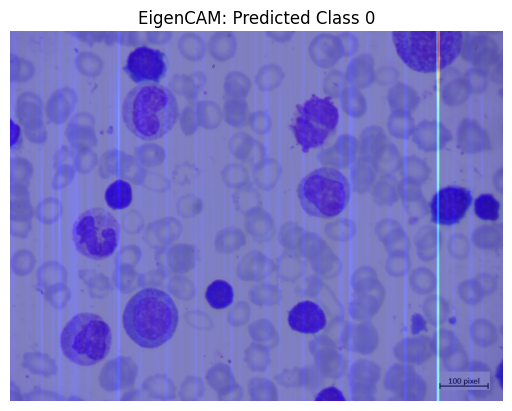


Generating EigenCAM for convnext...


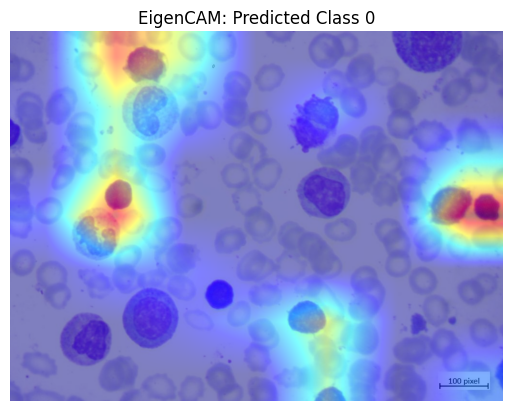


Generating EigenCAM for efficientnet...


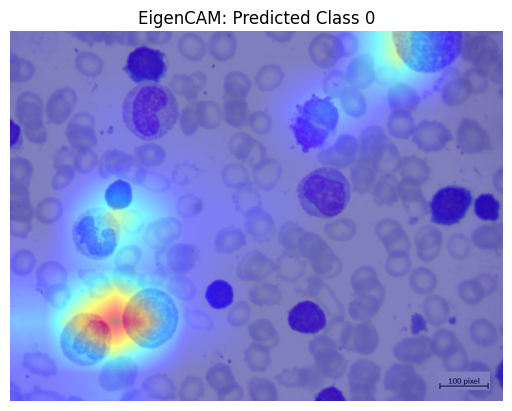

In [11]:
import torch
import timm
import torch.nn as nn
import torchvision.transforms as transforms
from pytorch_grad_cam.utils.image import show_cam_on_image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pytorch_grad_cam import EigenCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import cv2

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the number of classes
num_classes = 5  # Modify according to your dataset

# Initialize models
models = {
    'swin': timm.create_model('swin_tiny_patch4_window7_224', pretrained=False, num_classes=num_classes),
    'convnext': timm.create_model('convnext_tiny', pretrained=False, num_classes=num_classes),
    'efficientnet': timm.create_model('tf_efficientnetv2_s', pretrained=False, num_classes=num_classes)
}

# Load pre-trained weights
for model_name, model in models.items():
    try:
        state_dict = torch.load(f'{model_name}_best.pth', map_location=device)
        model.load_state_dict(state_dict, strict=False)
    except Exception as e:
        print(f"Error loading weights for {model_name}: {e}")

    model.to(device)
    model.eval()

# Image Preprocessing
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0)
    return img, img_tensor

# Get target layers for each model
def get_target_layer(model_name, model):
    if model_name == 'swin':
        return model.layers[-1]  # Last layer of Swin
    elif model_name == 'convnext':
        return model.stages[-1]  # Last stage of ConvNeXt
    elif model_name == 'efficientnet':
        return model.conv_head  # Final conv layer in EfficientNetV2
    else:
        raise ValueError(f"Unknown model: {model_name}")

def generate_eigencam(model, image, target_layer, class_idx=None):
    cam = EigenCAM(model, target_layers=[target_layer])

    # Preprocess image
    img, image_tensor = preprocess_image(image)
    image_tensor = image_tensor.to(device)

    # Forward pass
    outputs = model(image_tensor)
    if class_idx is None:
        class_idx = outputs.argmax(dim=1).item()

    # Generate EigenCAM heatmap
    targets = [ClassifierOutputTarget(class_idx)]
    grayscale_cam = cam(image_tensor, targets=targets)[0]

    # Resize heatmap to match original image size
    grayscale_cam_resized = cv2.resize(grayscale_cam, (img.width, img.height))

    # Convert to proper format for overlay
    img_np = np.array(img) / 255.0  # Normalize to [0,1] range
    visualization = show_cam_on_image(img_np, grayscale_cam_resized, use_rgb=True)

    # Show result
    plt.imshow(visualization)
    plt.axis('off')
    plt.title(f'EigenCAM: Predicted Class {class_idx}')
    plt.show()

# Visualize EigenCAM for a test image
def visualize_eigencam_for_model(model_name, model, image_path):
    print(f"\nGenerating EigenCAM for {model_name}...")
    target_layer = get_target_layer(model_name, model)
    generate_eigencam(model, image_path, target_layer)

# Main loop to generate EigenCAMs
image_path = 'Blood-Cell-Cancer-Classification-1/test/Benign/Sap_013-29-_jpg.rf.8412853ab0e16abea4c8d9fc87637d67.jpg'  # Replace with your image path
for model_name, model in models.items():
    visualize_eigencam_for_model(model_name, model, image_path)



Evaluating swin on Confusion Matrix...


This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


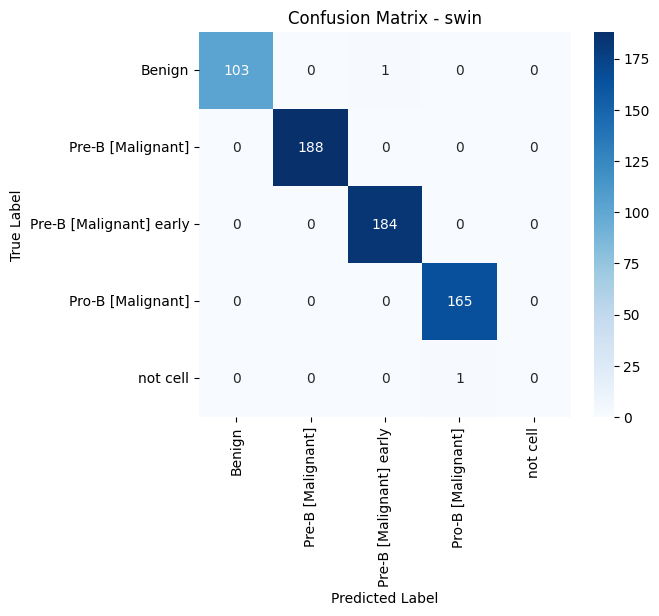


Evaluating convnext on Confusion Matrix...


This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


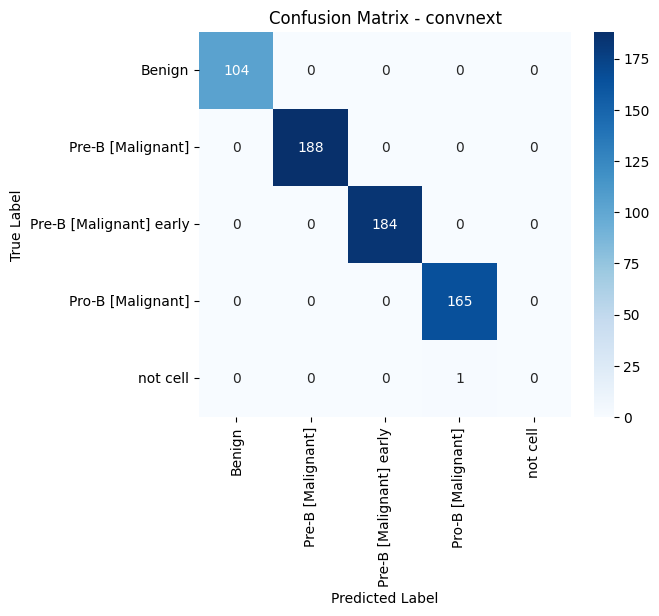


Evaluating efficientnet on Confusion Matrix...


This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


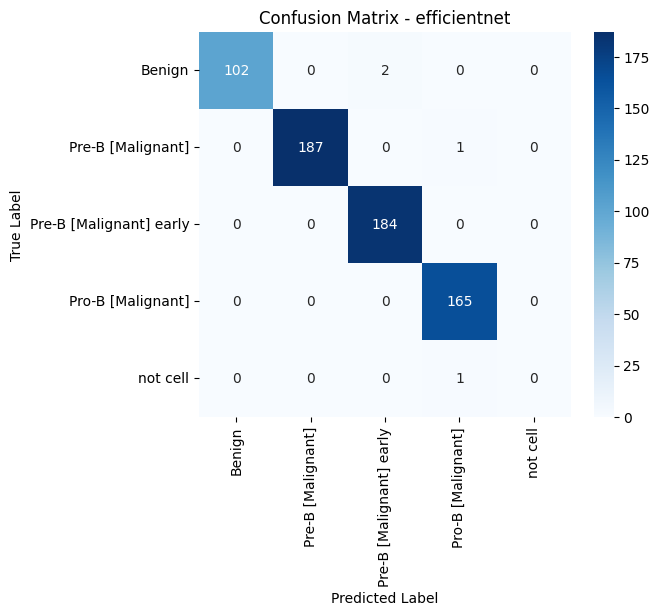

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names, model_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Generate confusion matrix for each trained model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} on Confusion Matrix...")

    # Load the best saved model
    model.load_state_dict(torch.load(f'{model_name}_best.pth'))
    model.eval()

    # Collect true and predicted labels
    y_true, y_pred = [], []

    with torch.no_grad():
        for inputs, labels in dataloaders['valid']:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # Plot the confusion matrix
    class_names = datasets_dict['train'].classes  # Get class labels
    plot_confusion_matrix(y_true, y_pred, class_names, model_name)


In [13]:
from sklearn.metrics import classification_report

# Function to generate classification report
def generate_classification_report(y_true, y_pred, class_names, model_name):
    report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
    print(f"\nClassification Report - {model_name}\n")
    print(report)

# Generate classification report for each trained model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} for Classification Report...")

    # Load the best saved model
    model.load_state_dict(torch.load(f'{model_name}_best.pth'))
    model.eval()

    # Collect true and predicted labels
    y_true, y_pred = [], []

    with torch.no_grad():
        for inputs, labels in dataloaders['valid']:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # Generate and print classification report
    class_names = datasets_dict['train'].classes  # Get class labels
    generate_classification_report(y_true, y_pred, class_names, model_name)



Evaluating swin for Classification Report...


This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Classification Report - swin

                         precision    recall  f1-score   support

                 Benign     1.0000    0.9904    0.9952       104
      Pre-B [Malignant]     1.0000    1.0000    1.0000       188
Pre-B [Malignant] early     0.9946    1.0000    0.9973       184
      Pro-B [Malignant]     0.9940    1.0000    0.9970       165
               not cell     0.0000    0.0000    0.0000         1

               accuracy                         0.9969       642
              macro avg     0.7977    0.7981    0.7979       642
           weighted avg     0.9953    0.9969    0.9961       642


Evaluating convnext for Classification Report...


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di


Classification Report - convnext

                         precision    recall  f1-score   support

                 Benign     1.0000    1.0000    1.0000       104
      Pre-B [Malignant]     1.0000    1.0000    1.0000       188
Pre-B [Malignant] early     1.0000    1.0000    1.0000       184
      Pro-B [Malignant]     0.9940    1.0000    0.9970       165
               not cell     0.0000    0.0000    0.0000         1

               accuracy                         0.9984       642
              macro avg     0.7988    0.8000    0.7994       642
           weighted avg     0.9969    0.9984    0.9977       642


Evaluating efficientnet for Classification Report...


This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



Classification Report - efficientnet

                         precision    recall  f1-score   support

                 Benign     1.0000    0.9808    0.9903       104
      Pre-B [Malignant]     1.0000    0.9947    0.9973       188
Pre-B [Malignant] early     0.9892    1.0000    0.9946       184
      Pro-B [Malignant]     0.9880    1.0000    0.9940       165
               not cell     0.0000    0.0000    0.0000         1

               accuracy                         0.9938       642
              macro avg     0.7955    0.7951    0.7952       642
           weighted avg     0.9923    0.9938    0.9930       642



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Evaluating swin for AUC-ROC Curve...


This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


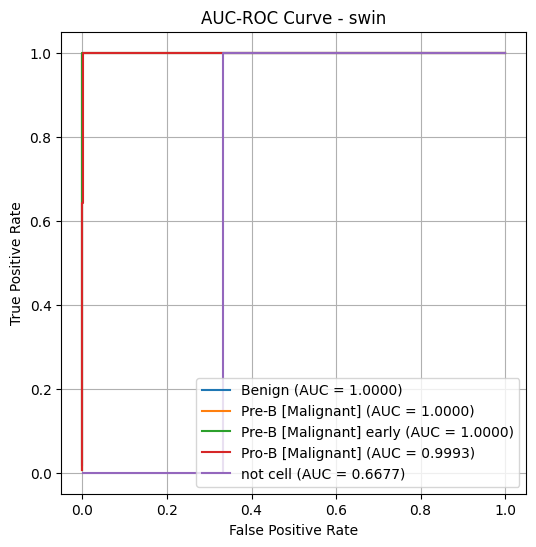


Evaluating convnext for AUC-ROC Curve...


This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


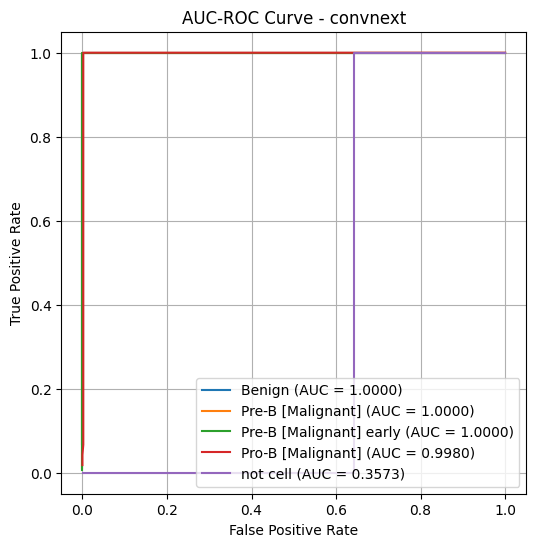


Evaluating efficientnet for AUC-ROC Curve...


This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


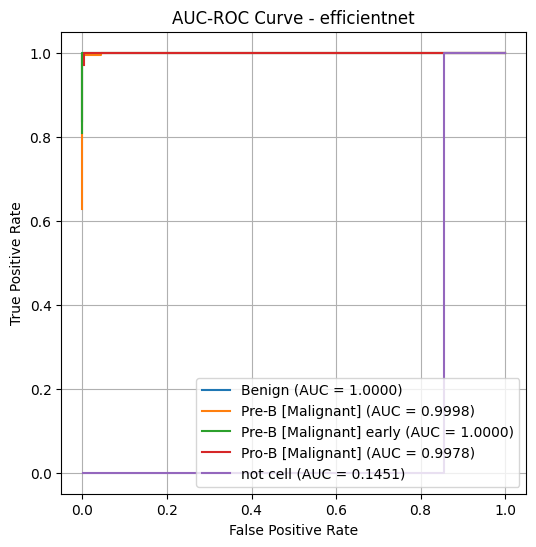

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Function to plot AUC-ROC Curve
def plot_roc_curve(y_true, y_scores, class_names, model_name):
    n_classes = len(class_names)
    y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))  # One-hot encode labels

    plt.figure(figsize=(6, 6))

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)

        # Remove (0,0) for better clarity of the rising curve
        fpr, tpr = fpr[1:], tpr[1:]

        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"AUC-ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Compute AUC-ROC for each trained model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} for AUC-ROC Curve...")

    # Load best saved model
    model.load_state_dict(torch.load(f'{model_name}_best.pth'))
    model.eval()

    # Collect true labels and predicted probabilities
    y_true, y_scores = [], []

    with torch.no_grad():
        for inputs, labels in dataloaders['valid']:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)  # Convert to probabilities

            y_true.extend(labels.cpu().numpy())
            y_scores.extend(probabilities.cpu().numpy())

    y_scores = np.array(y_scores)
    class_names = datasets_dict['train'].classes  # Get class labels

    # Plot AUC-ROC curve
    plot_roc_curve(y_true, y_scores, class_names, model_name)



Training swin...


The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


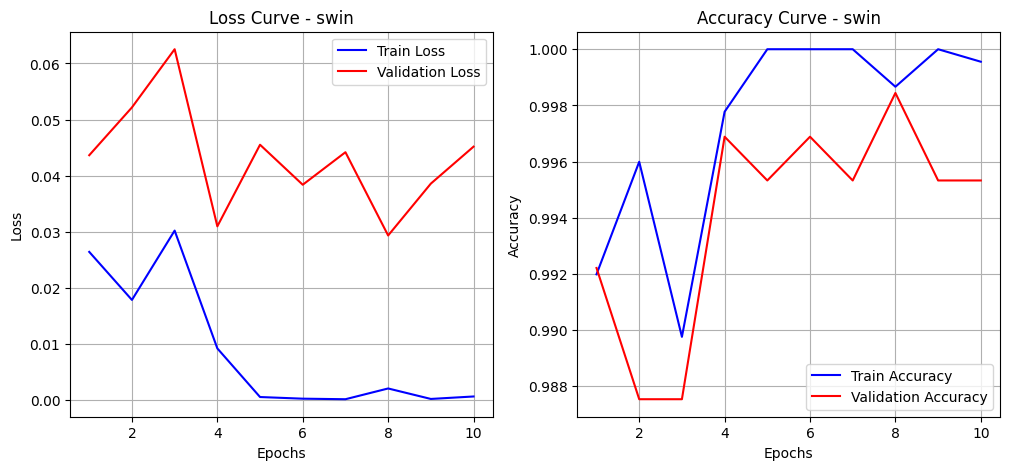


Training convnext...


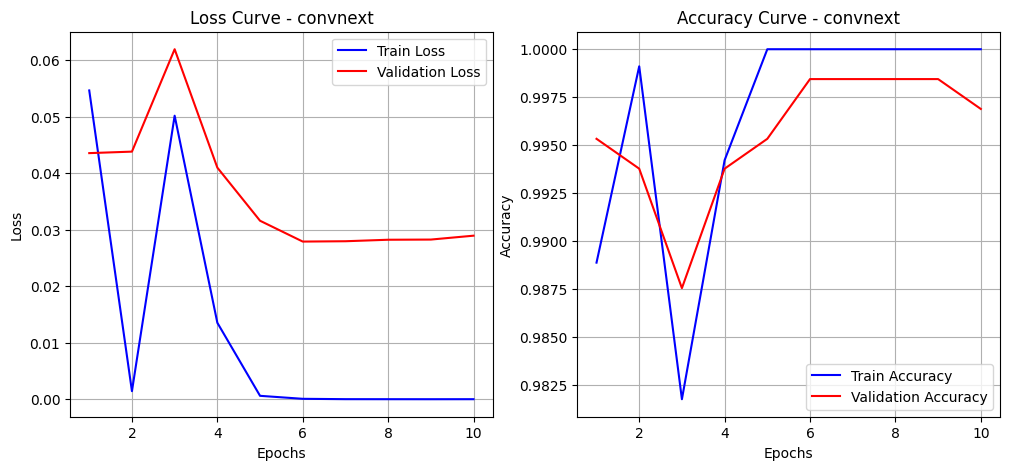


Training efficientnet...


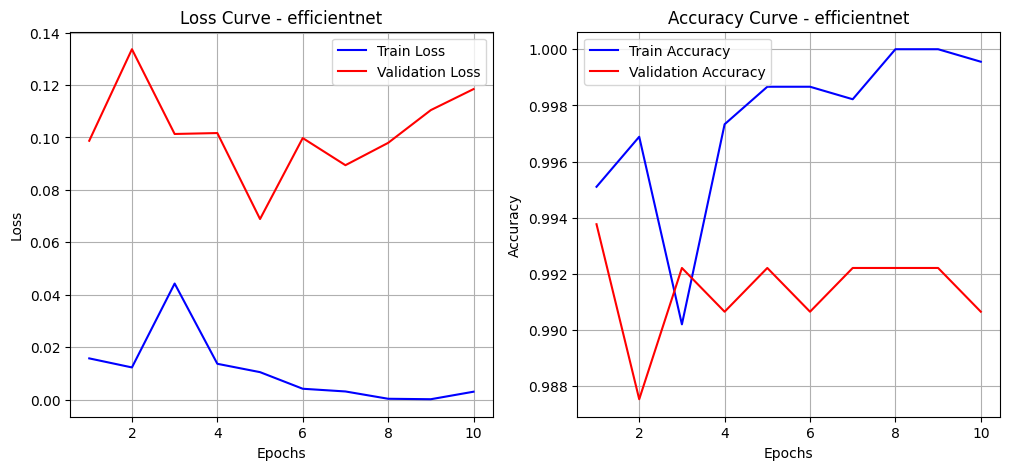

In [15]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss curves
def plot_training_curves(history, model_name):
    epochs = range(1, len(history['train_loss']) + 1)

    # Plot Loss Curve
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], label="Train Loss", color='blue')
    plt.plot(epochs, history['valid_loss'], label="Validation Loss", color='red')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Loss Curve - {model_name}")
    plt.legend()
    plt.grid()

    # Plot Accuracy Curve
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_acc'], label="Train Accuracy", color='blue')
    plt.plot(epochs, history['valid_acc'], label="Validation Accuracy", color='red')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy Curve - {model_name}")
    plt.legend()
    plt.grid()

    plt.show()

# Dictionary to store training history
training_histories = {}

# Train models and store accuracy/loss history
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)

    # Store loss and accuracy values
    history = {'train_loss': [], 'valid_loss': [], 'train_acc': [], 'valid_acc': []}

    for epoch in range(10):  # Assuming 10 epochs
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            correct = 0
            total = 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                correct += torch.sum(preds == labels.data)
                total += labels.size(0)

            epoch_loss = running_loss / len(datasets_dict[phase])
            epoch_acc = correct.double() / len(datasets_dict[phase])

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

        scheduler.step(history['valid_loss'][-1])

    training_histories[model_name] = history

    # Plot accuracy and loss curves for the model
    plot_training_curves(history, model_name)




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



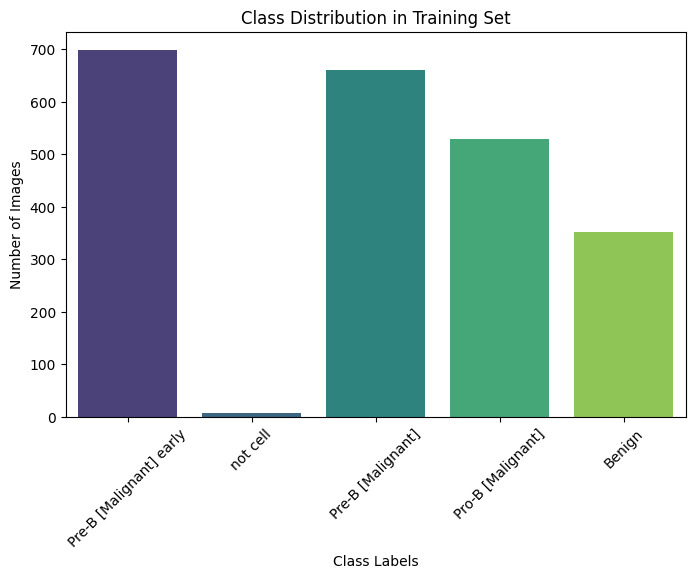



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



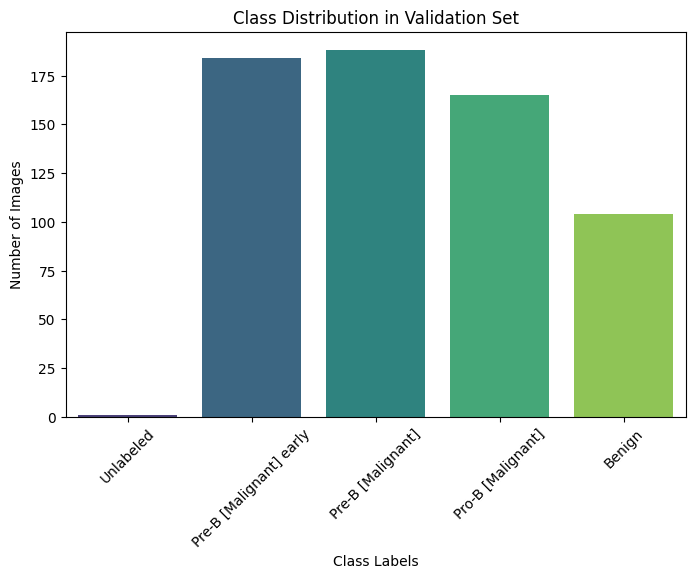

In [16]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Function to count images in each class
def get_class_distribution(data_dir):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Get class distribution for training and validation sets
train_class_counts = get_class_distribution(os.path.join(data_dir, 'train'))
valid_class_counts = get_class_distribution(os.path.join(data_dir, 'valid'))

# Plot class distribution
def plot_class_distribution(class_counts, dataset_type):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
    plt.xlabel("Class Labels")
    plt.ylabel("Number of Images")
    plt.title(f"Class Distribution in {dataset_type} Set")
    plt.xticks(rotation=45)
    plt.show()

# Plot for Training & Validation Sets
plot_class_distribution(train_class_counts, "Training")
plot_class_distribution(valid_class_counts, "Validation")


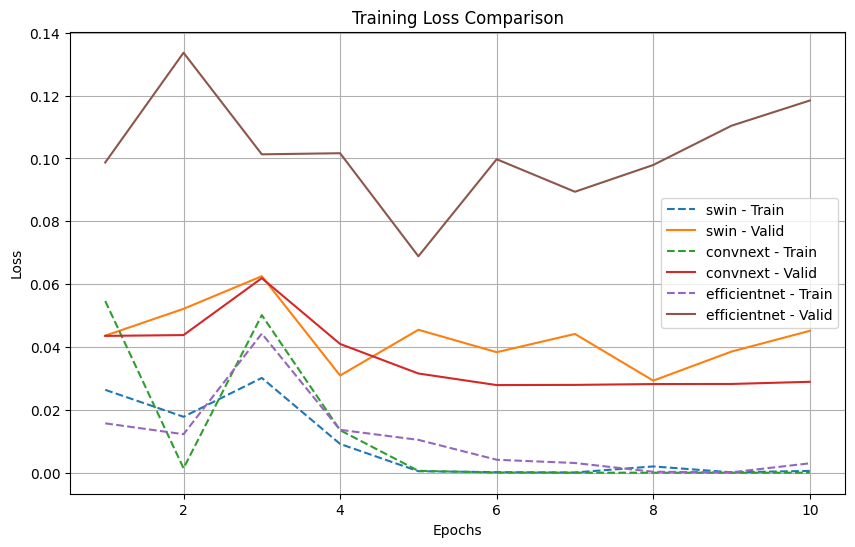

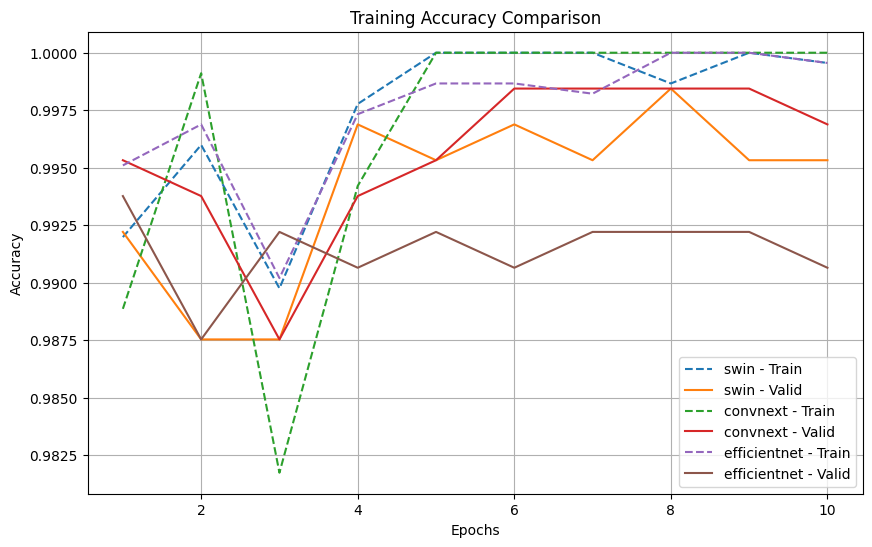

In [17]:
import matplotlib.pyplot as plt

# Function to plot comparison of training loss and accuracy
def plot_comparison(training_histories, metric, title, ylabel):
    plt.figure(figsize=(10, 6))

    for model_name, history in training_histories.items():
        plt.plot(range(1, len(history[f'train_{metric}']) + 1), history[f'train_{metric}'], label=f"{model_name} - Train", linestyle='dashed')
        plt.plot(range(1, len(history[f'valid_{metric}']) + 1), history[f'valid_{metric}'], label=f"{model_name} - Valid")

    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Plot training & validation loss comparison
plot_comparison(training_histories, "loss", "Training Loss Comparison", "Loss")

# Plot training & validation accuracy comparison
plot_comparison(training_histories, "acc", "Training Accuracy Comparison", "Accuracy")
